In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [16]:
names = ['win']
for i in range(1, 117):
    names.append('col'+str(i))
df = pd.read_csv("data/dota2Train.csv", names=names)
df.head()

,win,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


In [91]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(df)
print(fitted.data_max_)
dft = min_max_scaler.transform(df)
dft = pd.DataFrame(dft, columns=df.columns, index=list(df.index.values))
dft.head()

[  1. 261.   9.   3.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.
   1.   1.   1.   1.   1.]


,win,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116
0,0.0,0.746667,0.125,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5
1,1.0,0.273333,0.125,0.5,0.5,0.5,0.5,1.0,0.5,0.0,...,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5
2,1.0,0.133333,0.125,0.5,0.5,0.5,0.5,1.0,0.5,0.0,...,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5
3,1.0,0.286667,0.125,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.0,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5
4,0.0,0.400000,0.125,1.0,0.5,0.5,0.5,0.5,0.5,0.0,...,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5


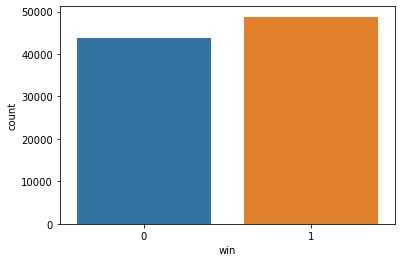

In [113]:
sns.countplot(x = 'win', data=df)

In [93]:
encode_map = {
    1:1,
    -1:0
}
dft['win'].replace(encode_map, inplace=True)
dft.head()

,win,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116
0,0.0,0.746667,0.125,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5
1,1.0,0.273333,0.125,0.5,0.5,0.5,0.5,1.0,0.5,0.0,...,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5
2,1.0,0.133333,0.125,0.5,0.5,0.5,0.5,1.0,0.5,0.0,...,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5
3,1.0,0.286667,0.125,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.0,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5
4,0.0,0.400000,0.125,1.0,0.5,0.5,0.5,0.5,0.5,0.0,...,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.5,0.5,0.5


In [94]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

print(y)

0        0
1        1
2        1
3        1
4        0
        ..
92645    0
92646    1
92647    1
92648    0
92649    0
Name: win, Length: 92650, dtype: int64


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [105]:
EPOCHS = 10000
BATCH_SIZE = 32
LEARNING_RATE = 0.01

In [106]:
class trainData(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

train_data = trainData(torch.FloatTensor(X_train), torch.FloatTensor(y_train))

class testData(Dataset):
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [107]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [108]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        self.layer_1 = nn.Linear(116, 64) 
        self.layer_2 = nn.Linear(64, 32)
        self.layer_3 = nn.Linear(32, 10)
        self.layer_out = nn.Linear(10, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(32)
        self.batchnorm3 = nn.BatchNorm1d(10)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [110]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=116, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=10, bias=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [111]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [112]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.67344 | Acc: 58.069
Epoch 002: | Loss: 0.66705 | Acc: 59.461
Epoch 003: | Loss: 0.66571 | Acc: 59.543
Epoch 004: | Loss: 0.66328 | Acc: 60.079
Epoch 005: | Loss: 0.66158 | Acc: 60.330
Epoch 006: | Loss: 0.65764 | Acc: 60.872
Epoch 007: | Loss: 0.65460 | Acc: 61.264
Epoch 008: | Loss: 0.65078 | Acc: 61.642
Epoch 009: | Loss: 0.64840 | Acc: 62.172
Epoch 010: | Loss: 0.64459 | Acc: 62.475
Epoch 011: | Loss: 0.64084 | Acc: 62.943
Epoch 012: | Loss: 0.63841 | Acc: 63.138
Epoch 013: | Loss: 0.63443 | Acc: 63.553
Epoch 014: | Loss: 0.63036 | Acc: 64.025
Epoch 015: | Loss: 0.62851 | Acc: 64.151
Epoch 016: | Loss: 0.62571 | Acc: 64.594
Epoch 017: | Loss: 0.62247 | Acc: 65.067
Epoch 018: | Loss: 0.62007 | Acc: 65.140
Epoch 019: | Loss: 0.61808 | Acc: 65.566
Epoch 020: | Loss: 0.61450 | Acc: 65.901
Epoch 021: | Loss: 0.61341 | Acc: 66.093
Epoch 022: | Loss: 0.61035 | Acc: 66.325
Epoch 023: | Loss: 0.60812 | Acc: 66.547
Epoch 024: | Loss: 0.60729 | Acc: 66.617
Epoch 025: | Los

Epoch 201: | Loss: 0.52790 | Acc: 73.744
Epoch 202: | Loss: 0.52964 | Acc: 73.640
Epoch 203: | Loss: 0.52900 | Acc: 73.666
Epoch 204: | Loss: 0.52674 | Acc: 73.950
Epoch 205: | Loss: 0.52863 | Acc: 73.794
Epoch 206: | Loss: 0.52837 | Acc: 73.936
Epoch 207: | Loss: 0.52829 | Acc: 73.502
Epoch 208: | Loss: 0.52826 | Acc: 73.768
Epoch 209: | Loss: 0.52789 | Acc: 73.781
Epoch 210: | Loss: 0.52813 | Acc: 73.704
Epoch 211: | Loss: 0.52662 | Acc: 73.780
Epoch 212: | Loss: 0.52587 | Acc: 73.956
Epoch 213: | Loss: 0.52516 | Acc: 73.924
Epoch 214: | Loss: 0.52832 | Acc: 73.878
Epoch 215: | Loss: 0.52612 | Acc: 73.890
Epoch 216: | Loss: 0.52599 | Acc: 73.827
Epoch 217: | Loss: 0.52652 | Acc: 73.714
Epoch 218: | Loss: 0.52449 | Acc: 74.011
Epoch 219: | Loss: 0.52582 | Acc: 73.942
Epoch 220: | Loss: 0.52486 | Acc: 74.061
Epoch 221: | Loss: 0.52594 | Acc: 73.723
Epoch 222: | Loss: 0.52372 | Acc: 74.074
Epoch 223: | Loss: 0.52470 | Acc: 74.002
Epoch 224: | Loss: 0.52450 | Acc: 74.005
Epoch 225: | Los

Epoch 401: | Loss: 0.50884 | Acc: 75.256
Epoch 402: | Loss: 0.51142 | Acc: 74.926
Epoch 403: | Loss: 0.51029 | Acc: 75.016
Epoch 404: | Loss: 0.50995 | Acc: 75.248
Epoch 405: | Loss: 0.50991 | Acc: 75.182
Epoch 406: | Loss: 0.51092 | Acc: 75.215
Epoch 407: | Loss: 0.51119 | Acc: 75.067
Epoch 408: | Loss: 0.51053 | Acc: 75.116
Epoch 409: | Loss: 0.50975 | Acc: 75.119
Epoch 410: | Loss: 0.50888 | Acc: 75.053
Epoch 411: | Loss: 0.50813 | Acc: 75.221
Epoch 412: | Loss: 0.51042 | Acc: 75.132
Epoch 413: | Loss: 0.50915 | Acc: 75.100
Epoch 414: | Loss: 0.51014 | Acc: 75.187
Epoch 415: | Loss: 0.51112 | Acc: 75.031
Epoch 416: | Loss: 0.50991 | Acc: 75.186
Epoch 417: | Loss: 0.51114 | Acc: 75.122
Epoch 418: | Loss: 0.50992 | Acc: 74.945
Epoch 419: | Loss: 0.50992 | Acc: 75.169
Epoch 420: | Loss: 0.50980 | Acc: 74.970
Epoch 421: | Loss: 0.50727 | Acc: 75.461
Epoch 422: | Loss: 0.51029 | Acc: 75.112
Epoch 423: | Loss: 0.50968 | Acc: 75.012
Epoch 424: | Loss: 0.50756 | Acc: 75.411
Epoch 425: | Los

Epoch 601: | Loss: 0.49944 | Acc: 75.897
Epoch 602: | Loss: 0.50361 | Acc: 75.723
Epoch 603: | Loss: 0.50202 | Acc: 75.670
Epoch 604: | Loss: 0.50344 | Acc: 75.700
Epoch 605: | Loss: 0.50058 | Acc: 75.638
Epoch 606: | Loss: 0.50118 | Acc: 75.904
Epoch 607: | Loss: 0.50071 | Acc: 75.860
Epoch 608: | Loss: 0.50113 | Acc: 75.744
Epoch 609: | Loss: 0.50166 | Acc: 75.673
Epoch 610: | Loss: 0.50316 | Acc: 75.577
Epoch 611: | Loss: 0.49986 | Acc: 75.649
Epoch 612: | Loss: 0.50205 | Acc: 75.706
Epoch 613: | Loss: 0.50239 | Acc: 75.762
Epoch 614: | Loss: 0.50167 | Acc: 75.805
Epoch 615: | Loss: 0.50185 | Acc: 75.639
Epoch 616: | Loss: 0.49979 | Acc: 75.747
Epoch 617: | Loss: 0.50080 | Acc: 75.782
Epoch 618: | Loss: 0.50045 | Acc: 75.882
Epoch 619: | Loss: 0.50085 | Acc: 75.731
Epoch 620: | Loss: 0.50228 | Acc: 75.719
Epoch 621: | Loss: 0.50046 | Acc: 75.810
Epoch 622: | Loss: 0.50268 | Acc: 75.558
Epoch 623: | Loss: 0.50078 | Acc: 75.807
Epoch 624: | Loss: 0.49943 | Acc: 75.699
Epoch 625: | Los

Epoch 801: | Loss: 0.49646 | Acc: 76.031
Epoch 802: | Loss: 0.49542 | Acc: 76.325
Epoch 803: | Loss: 0.49794 | Acc: 75.870
Epoch 804: | Loss: 0.49583 | Acc: 76.258
Epoch 805: | Loss: 0.49493 | Acc: 76.245
Epoch 806: | Loss: 0.49852 | Acc: 76.026
Epoch 807: | Loss: 0.49553 | Acc: 76.180
Epoch 808: | Loss: 0.49619 | Acc: 76.019
Epoch 809: | Loss: 0.49596 | Acc: 76.135
Epoch 810: | Loss: 0.49717 | Acc: 76.036
Epoch 811: | Loss: 0.49533 | Acc: 76.128
Epoch 812: | Loss: 0.49468 | Acc: 76.234
Epoch 813: | Loss: 0.49501 | Acc: 76.248
Epoch 814: | Loss: 0.49537 | Acc: 76.123
Epoch 815: | Loss: 0.49740 | Acc: 76.099
Epoch 816: | Loss: 0.49698 | Acc: 75.936
Epoch 817: | Loss: 0.49558 | Acc: 75.903
Epoch 818: | Loss: 0.49711 | Acc: 75.965
Epoch 819: | Loss: 0.49808 | Acc: 76.123
Epoch 820: | Loss: 0.49624 | Acc: 76.297
Epoch 821: | Loss: 0.49571 | Acc: 76.056
Epoch 822: | Loss: 0.49615 | Acc: 76.076
Epoch 823: | Loss: 0.49811 | Acc: 76.038
Epoch 824: | Loss: 0.49661 | Acc: 76.113
Epoch 825: | Los

Epoch 1001: | Loss: 0.49275 | Acc: 76.330
Epoch 1002: | Loss: 0.49417 | Acc: 76.231
Epoch 1003: | Loss: 0.49458 | Acc: 76.210
Epoch 1004: | Loss: 0.49429 | Acc: 76.021
Epoch 1005: | Loss: 0.49463 | Acc: 76.437
Epoch 1006: | Loss: 0.49284 | Acc: 76.176
Epoch 1007: | Loss: 0.49477 | Acc: 76.135
Epoch 1008: | Loss: 0.49306 | Acc: 76.284
Epoch 1009: | Loss: 0.49354 | Acc: 76.312
Epoch 1010: | Loss: 0.49200 | Acc: 76.212
Epoch 1011: | Loss: 0.49283 | Acc: 76.374
Epoch 1012: | Loss: 0.49440 | Acc: 76.288
Epoch 1013: | Loss: 0.49434 | Acc: 76.138
Epoch 1014: | Loss: 0.49374 | Acc: 76.207
Epoch 1015: | Loss: 0.49289 | Acc: 76.192
Epoch 1016: | Loss: 0.49180 | Acc: 76.416
Epoch 1017: | Loss: 0.49373 | Acc: 76.196
Epoch 1018: | Loss: 0.49309 | Acc: 76.547
Epoch 1019: | Loss: 0.49349 | Acc: 76.242
Epoch 1020: | Loss: 0.49124 | Acc: 76.081
Epoch 1021: | Loss: 0.49207 | Acc: 76.563
Epoch 1022: | Loss: 0.49407 | Acc: 76.245
Epoch 1023: | Loss: 0.49293 | Acc: 76.482
Epoch 1024: | Loss: 0.49280 | Acc:

Epoch 1197: | Loss: 0.48950 | Acc: 76.495
Epoch 1198: | Loss: 0.49001 | Acc: 76.599
Epoch 1199: | Loss: 0.49134 | Acc: 76.424
Epoch 1200: | Loss: 0.49091 | Acc: 76.448
Epoch 1201: | Loss: 0.49223 | Acc: 76.458
Epoch 1202: | Loss: 0.48956 | Acc: 76.499
Epoch 1203: | Loss: 0.49066 | Acc: 76.362
Epoch 1204: | Loss: 0.48941 | Acc: 76.436
Epoch 1205: | Loss: 0.49063 | Acc: 76.360
Epoch 1206: | Loss: 0.49154 | Acc: 76.382
Epoch 1207: | Loss: 0.49093 | Acc: 76.404
Epoch 1208: | Loss: 0.48989 | Acc: 76.552
Epoch 1209: | Loss: 0.49056 | Acc: 76.390
Epoch 1210: | Loss: 0.49107 | Acc: 76.431
Epoch 1211: | Loss: 0.49157 | Acc: 76.428
Epoch 1212: | Loss: 0.49135 | Acc: 76.397
Epoch 1213: | Loss: 0.48940 | Acc: 76.486
Epoch 1214: | Loss: 0.48971 | Acc: 76.345
Epoch 1215: | Loss: 0.49170 | Acc: 76.256
Epoch 1216: | Loss: 0.49001 | Acc: 76.227
Epoch 1217: | Loss: 0.48702 | Acc: 76.808
Epoch 1218: | Loss: 0.48985 | Acc: 76.497
Epoch 1219: | Loss: 0.48705 | Acc: 76.556
Epoch 1220: | Loss: 0.49032 | Acc:

Epoch 1393: | Loss: 0.48690 | Acc: 76.684
Epoch 1394: | Loss: 0.48779 | Acc: 76.547
Epoch 1395: | Loss: 0.48832 | Acc: 76.616
Epoch 1396: | Loss: 0.48900 | Acc: 76.598
Epoch 1397: | Loss: 0.48855 | Acc: 76.402
Epoch 1398: | Loss: 0.48946 | Acc: 76.409
Epoch 1399: | Loss: 0.48773 | Acc: 76.485
Epoch 1400: | Loss: 0.48801 | Acc: 76.647
Epoch 1401: | Loss: 0.48808 | Acc: 76.655
Epoch 1402: | Loss: 0.48789 | Acc: 76.601
Epoch 1403: | Loss: 0.48730 | Acc: 76.668
Epoch 1404: | Loss: 0.49034 | Acc: 76.561
Epoch 1405: | Loss: 0.48945 | Acc: 76.603
Epoch 1406: | Loss: 0.48710 | Acc: 76.661
Epoch 1407: | Loss: 0.48739 | Acc: 76.731
Epoch 1408: | Loss: 0.48723 | Acc: 76.799
Epoch 1409: | Loss: 0.48907 | Acc: 76.634
Epoch 1410: | Loss: 0.48786 | Acc: 76.646
Epoch 1411: | Loss: 0.48707 | Acc: 76.731
Epoch 1412: | Loss: 0.49028 | Acc: 76.485
Epoch 1413: | Loss: 0.48864 | Acc: 76.631
Epoch 1414: | Loss: 0.48681 | Acc: 76.674
Epoch 1415: | Loss: 0.48736 | Acc: 76.644
Epoch 1416: | Loss: 0.48616 | Acc:

Epoch 1589: | Loss: 0.48701 | Acc: 76.769
Epoch 1590: | Loss: 0.48519 | Acc: 76.805
Epoch 1591: | Loss: 0.48642 | Acc: 76.614
Epoch 1592: | Loss: 0.48666 | Acc: 76.753
Epoch 1593: | Loss: 0.48751 | Acc: 76.680
Epoch 1594: | Loss: 0.48581 | Acc: 76.835
Epoch 1595: | Loss: 0.48538 | Acc: 76.736
Epoch 1596: | Loss: 0.48613 | Acc: 76.663
Epoch 1597: | Loss: 0.48595 | Acc: 76.714
Epoch 1598: | Loss: 0.48679 | Acc: 76.679
Epoch 1599: | Loss: 0.48813 | Acc: 76.562
Epoch 1600: | Loss: 0.48639 | Acc: 76.680
Epoch 1601: | Loss: 0.48671 | Acc: 76.762
Epoch 1602: | Loss: 0.48563 | Acc: 76.808
Epoch 1603: | Loss: 0.48846 | Acc: 76.432
Epoch 1604: | Loss: 0.48571 | Acc: 76.668
Epoch 1605: | Loss: 0.48715 | Acc: 76.930
Epoch 1606: | Loss: 0.48578 | Acc: 76.647
Epoch 1607: | Loss: 0.48570 | Acc: 76.712
Epoch 1608: | Loss: 0.48748 | Acc: 76.832
Epoch 1609: | Loss: 0.48733 | Acc: 76.614
Epoch 1610: | Loss: 0.48660 | Acc: 76.696
Epoch 1611: | Loss: 0.48651 | Acc: 76.780
Epoch 1612: | Loss: 0.48690 | Acc:

Epoch 1785: | Loss: 0.48645 | Acc: 76.760
Epoch 1786: | Loss: 0.48564 | Acc: 76.905
Epoch 1787: | Loss: 0.48541 | Acc: 76.828
Epoch 1788: | Loss: 0.48481 | Acc: 76.660
Epoch 1789: | Loss: 0.48476 | Acc: 76.790
Epoch 1790: | Loss: 0.48577 | Acc: 76.681
Epoch 1791: | Loss: 0.48499 | Acc: 76.812
Epoch 1792: | Loss: 0.48782 | Acc: 76.569
Epoch 1793: | Loss: 0.48416 | Acc: 76.886
Epoch 1794: | Loss: 0.48408 | Acc: 76.751
Epoch 1795: | Loss: 0.48400 | Acc: 76.791
Epoch 1796: | Loss: 0.48653 | Acc: 76.656
Epoch 1797: | Loss: 0.48582 | Acc: 76.854
Epoch 1798: | Loss: 0.48446 | Acc: 76.854
Epoch 1799: | Loss: 0.48632 | Acc: 76.904
Epoch 1800: | Loss: 0.48537 | Acc: 76.922
Epoch 1801: | Loss: 0.48421 | Acc: 76.813
Epoch 1802: | Loss: 0.48297 | Acc: 76.939
Epoch 1803: | Loss: 0.48635 | Acc: 76.680
Epoch 1804: | Loss: 0.48488 | Acc: 76.644
Epoch 1805: | Loss: 0.48538 | Acc: 76.870
Epoch 1806: | Loss: 0.48604 | Acc: 76.859
Epoch 1807: | Loss: 0.48639 | Acc: 76.674
Epoch 1808: | Loss: 0.48484 | Acc:

Epoch 1981: | Loss: 0.48654 | Acc: 76.679
Epoch 1982: | Loss: 0.48467 | Acc: 76.776
Epoch 1983: | Loss: 0.48353 | Acc: 76.899
Epoch 1984: | Loss: 0.48439 | Acc: 76.777
Epoch 1985: | Loss: 0.48515 | Acc: 76.798
Epoch 1986: | Loss: 0.48579 | Acc: 76.871
Epoch 1987: | Loss: 0.48498 | Acc: 76.849
Epoch 1988: | Loss: 0.48405 | Acc: 76.787
Epoch 1989: | Loss: 0.48506 | Acc: 76.854
Epoch 1990: | Loss: 0.48158 | Acc: 77.016
Epoch 1991: | Loss: 0.48583 | Acc: 76.686
Epoch 1992: | Loss: 0.48338 | Acc: 76.870
Epoch 1993: | Loss: 0.48120 | Acc: 77.123
Epoch 1994: | Loss: 0.48236 | Acc: 77.072
Epoch 1995: | Loss: 0.48528 | Acc: 76.661
Epoch 1996: | Loss: 0.48416 | Acc: 76.975
Epoch 1997: | Loss: 0.48247 | Acc: 76.935
Epoch 1998: | Loss: 0.48606 | Acc: 76.644
Epoch 1999: | Loss: 0.48203 | Acc: 76.984
Epoch 2000: | Loss: 0.48369 | Acc: 76.753
Epoch 2001: | Loss: 0.48393 | Acc: 76.829
Epoch 2002: | Loss: 0.48571 | Acc: 76.715
Epoch 2003: | Loss: 0.48335 | Acc: 76.857
Epoch 2004: | Loss: 0.48569 | Acc:

Epoch 2178: | Loss: 0.48192 | Acc: 76.886
Epoch 2179: | Loss: 0.48261 | Acc: 76.764
Epoch 2180: | Loss: 0.48355 | Acc: 77.044
Epoch 2181: | Loss: 0.48570 | Acc: 76.612
Epoch 2182: | Loss: 0.48225 | Acc: 77.022
Epoch 2183: | Loss: 0.48379 | Acc: 76.687
Epoch 2184: | Loss: 0.48397 | Acc: 76.833
Epoch 2185: | Loss: 0.48260 | Acc: 76.861
Epoch 2186: | Loss: 0.48346 | Acc: 76.946
Epoch 2187: | Loss: 0.48177 | Acc: 77.003
Epoch 2188: | Loss: 0.48470 | Acc: 76.775
Epoch 2189: | Loss: 0.48616 | Acc: 76.616
Epoch 2190: | Loss: 0.48399 | Acc: 76.759
Epoch 2191: | Loss: 0.48312 | Acc: 76.865
Epoch 2192: | Loss: 0.48404 | Acc: 77.064
Epoch 2193: | Loss: 0.48128 | Acc: 76.931
Epoch 2194: | Loss: 0.48242 | Acc: 76.839
Epoch 2195: | Loss: 0.48147 | Acc: 76.978
Epoch 2196: | Loss: 0.48400 | Acc: 76.792
Epoch 2197: | Loss: 0.48486 | Acc: 76.815
Epoch 2198: | Loss: 0.48163 | Acc: 76.912
Epoch 2199: | Loss: 0.48382 | Acc: 76.810
Epoch 2200: | Loss: 0.48372 | Acc: 76.865
Epoch 2201: | Loss: 0.48222 | Acc:

Epoch 2374: | Loss: 0.48086 | Acc: 77.032
Epoch 2375: | Loss: 0.48336 | Acc: 76.833
Epoch 2376: | Loss: 0.48325 | Acc: 76.859
Epoch 2377: | Loss: 0.48334 | Acc: 76.918
Epoch 2378: | Loss: 0.48466 | Acc: 76.757
Epoch 2379: | Loss: 0.48058 | Acc: 77.137
Epoch 2380: | Loss: 0.48260 | Acc: 76.797
Epoch 2381: | Loss: 0.48360 | Acc: 76.794
Epoch 2382: | Loss: 0.48047 | Acc: 77.046
Epoch 2383: | Loss: 0.48069 | Acc: 77.142
Epoch 2384: | Loss: 0.48333 | Acc: 76.871
Epoch 2385: | Loss: 0.48213 | Acc: 77.003
Epoch 2386: | Loss: 0.48501 | Acc: 76.753
Epoch 2387: | Loss: 0.48211 | Acc: 77.051
Epoch 2388: | Loss: 0.48180 | Acc: 76.920
Epoch 2389: | Loss: 0.48278 | Acc: 76.910
Epoch 2390: | Loss: 0.48330 | Acc: 76.827
Epoch 2391: | Loss: 0.48253 | Acc: 77.045
Epoch 2392: | Loss: 0.48268 | Acc: 76.976
Epoch 2393: | Loss: 0.48068 | Acc: 77.057
Epoch 2394: | Loss: 0.48232 | Acc: 77.117
Epoch 2395: | Loss: 0.48310 | Acc: 77.040
Epoch 2396: | Loss: 0.48205 | Acc: 77.004
Epoch 2397: | Loss: 0.48185 | Acc:

Epoch 2570: | Loss: 0.48099 | Acc: 77.099
Epoch 2571: | Loss: 0.48123 | Acc: 77.211
Epoch 2572: | Loss: 0.48179 | Acc: 77.072
Epoch 2573: | Loss: 0.48299 | Acc: 76.974
Epoch 2574: | Loss: 0.48116 | Acc: 77.134
Epoch 2575: | Loss: 0.48155 | Acc: 76.992
Epoch 2576: | Loss: 0.48173 | Acc: 76.794
Epoch 2577: | Loss: 0.48248 | Acc: 76.880
Epoch 2578: | Loss: 0.48126 | Acc: 76.899
Epoch 2579: | Loss: 0.47896 | Acc: 77.204
Epoch 2580: | Loss: 0.48112 | Acc: 76.946
Epoch 2581: | Loss: 0.48196 | Acc: 77.003
Epoch 2582: | Loss: 0.47915 | Acc: 77.118
Epoch 2583: | Loss: 0.47822 | Acc: 77.124
Epoch 2584: | Loss: 0.48211 | Acc: 76.821
Epoch 2585: | Loss: 0.48021 | Acc: 77.201
Epoch 2586: | Loss: 0.48190 | Acc: 76.881
Epoch 2587: | Loss: 0.48458 | Acc: 76.818
Epoch 2588: | Loss: 0.48238 | Acc: 77.063
Epoch 2589: | Loss: 0.48122 | Acc: 77.050
Epoch 2590: | Loss: 0.48153 | Acc: 77.028
Epoch 2591: | Loss: 0.48043 | Acc: 77.118
Epoch 2592: | Loss: 0.47987 | Acc: 77.270
Epoch 2593: | Loss: 0.48481 | Acc:

Epoch 2766: | Loss: 0.48253 | Acc: 76.974
Epoch 2767: | Loss: 0.48097 | Acc: 76.999
Epoch 2768: | Loss: 0.47931 | Acc: 77.225
Epoch 2769: | Loss: 0.48039 | Acc: 77.115
Epoch 2770: | Loss: 0.47862 | Acc: 77.155
Epoch 2771: | Loss: 0.48119 | Acc: 76.916
Epoch 2772: | Loss: 0.47862 | Acc: 77.212
Epoch 2773: | Loss: 0.47959 | Acc: 77.057
Epoch 2774: | Loss: 0.48212 | Acc: 76.895
Epoch 2775: | Loss: 0.47894 | Acc: 77.045
Epoch 2776: | Loss: 0.48290 | Acc: 76.801
Epoch 2777: | Loss: 0.48012 | Acc: 77.147
Epoch 2778: | Loss: 0.48071 | Acc: 76.982
Epoch 2779: | Loss: 0.48049 | Acc: 76.995
Epoch 2780: | Loss: 0.48356 | Acc: 76.867
Epoch 2781: | Loss: 0.48126 | Acc: 77.067
Epoch 2782: | Loss: 0.48037 | Acc: 77.215
Epoch 2783: | Loss: 0.48159 | Acc: 76.976
Epoch 2784: | Loss: 0.48131 | Acc: 77.008
Epoch 2785: | Loss: 0.48082 | Acc: 76.888
Epoch 2786: | Loss: 0.48144 | Acc: 77.097
Epoch 2787: | Loss: 0.48192 | Acc: 76.997
Epoch 2788: | Loss: 0.48092 | Acc: 77.158
Epoch 2789: | Loss: 0.48190 | Acc:

Epoch 2962: | Loss: 0.48166 | Acc: 76.985
Epoch 2963: | Loss: 0.47989 | Acc: 77.110
Epoch 2964: | Loss: 0.48015 | Acc: 77.145
Epoch 2965: | Loss: 0.47932 | Acc: 77.104
Epoch 2966: | Loss: 0.48009 | Acc: 77.107
Epoch 2967: | Loss: 0.48032 | Acc: 77.087
Epoch 2968: | Loss: 0.47997 | Acc: 77.057
Epoch 2969: | Loss: 0.47882 | Acc: 77.035
Epoch 2970: | Loss: 0.47803 | Acc: 77.241
Epoch 2971: | Loss: 0.47902 | Acc: 77.136
Epoch 2972: | Loss: 0.47994 | Acc: 77.112
Epoch 2973: | Loss: 0.47905 | Acc: 77.084
Epoch 2974: | Loss: 0.48077 | Acc: 77.061
Epoch 2975: | Loss: 0.48068 | Acc: 77.075
Epoch 2976: | Loss: 0.47904 | Acc: 77.105
Epoch 2977: | Loss: 0.48046 | Acc: 77.063
Epoch 2978: | Loss: 0.47826 | Acc: 77.222
Epoch 2979: | Loss: 0.47865 | Acc: 77.093
Epoch 2980: | Loss: 0.48059 | Acc: 77.160
Epoch 2981: | Loss: 0.48058 | Acc: 77.072
Epoch 2982: | Loss: 0.48034 | Acc: 77.099
Epoch 2983: | Loss: 0.47870 | Acc: 77.094
Epoch 2984: | Loss: 0.47933 | Acc: 77.170
Epoch 2985: | Loss: 0.47970 | Acc:

Epoch 3158: | Loss: 0.47770 | Acc: 77.103
Epoch 3159: | Loss: 0.47829 | Acc: 77.236
Epoch 3160: | Loss: 0.48078 | Acc: 77.009
Epoch 3161: | Loss: 0.47898 | Acc: 77.175
Epoch 3162: | Loss: 0.47925 | Acc: 77.042
Epoch 3163: | Loss: 0.47943 | Acc: 77.126
Epoch 3164: | Loss: 0.47866 | Acc: 77.151
Epoch 3165: | Loss: 0.47976 | Acc: 77.034
Epoch 3166: | Loss: 0.47974 | Acc: 77.054
Epoch 3167: | Loss: 0.47881 | Acc: 77.121
Epoch 3168: | Loss: 0.47877 | Acc: 77.018
Epoch 3169: | Loss: 0.48064 | Acc: 77.042
Epoch 3170: | Loss: 0.47904 | Acc: 77.009
Epoch 3171: | Loss: 0.48175 | Acc: 76.867
Epoch 3172: | Loss: 0.47964 | Acc: 77.182
Epoch 3173: | Loss: 0.47807 | Acc: 77.164
Epoch 3174: | Loss: 0.47954 | Acc: 77.112
Epoch 3175: | Loss: 0.48054 | Acc: 77.071
Epoch 3176: | Loss: 0.47866 | Acc: 77.119
Epoch 3177: | Loss: 0.47888 | Acc: 77.049
Epoch 3178: | Loss: 0.48033 | Acc: 77.124
Epoch 3179: | Loss: 0.47704 | Acc: 77.367
Epoch 3180: | Loss: 0.48023 | Acc: 77.106
Epoch 3181: | Loss: 0.47889 | Acc:

Epoch 3354: | Loss: 0.48064 | Acc: 77.023
Epoch 3355: | Loss: 0.48041 | Acc: 76.910
Epoch 3356: | Loss: 0.48047 | Acc: 77.136
Epoch 3357: | Loss: 0.47809 | Acc: 77.168
Epoch 3358: | Loss: 0.47950 | Acc: 77.194
Epoch 3359: | Loss: 0.47785 | Acc: 77.256
Epoch 3360: | Loss: 0.47718 | Acc: 77.222
Epoch 3361: | Loss: 0.48005 | Acc: 77.070
Epoch 3362: | Loss: 0.47848 | Acc: 77.197
Epoch 3363: | Loss: 0.48001 | Acc: 77.135
Epoch 3364: | Loss: 0.47998 | Acc: 77.125
Epoch 3365: | Loss: 0.47897 | Acc: 77.181
Epoch 3366: | Loss: 0.47975 | Acc: 77.063
Epoch 3367: | Loss: 0.48001 | Acc: 77.004
Epoch 3368: | Loss: 0.47703 | Acc: 77.407
Epoch 3369: | Loss: 0.47845 | Acc: 77.421
Epoch 3370: | Loss: 0.47788 | Acc: 77.208
Epoch 3371: | Loss: 0.47969 | Acc: 77.229
Epoch 3372: | Loss: 0.47745 | Acc: 77.215
Epoch 3373: | Loss: 0.47984 | Acc: 77.149
Epoch 3374: | Loss: 0.47982 | Acc: 77.249
Epoch 3375: | Loss: 0.48023 | Acc: 77.102
Epoch 3376: | Loss: 0.48012 | Acc: 77.238
Epoch 3377: | Loss: 0.47736 | Acc:

Epoch 3550: | Loss: 0.48088 | Acc: 77.077
Epoch 3551: | Loss: 0.47783 | Acc: 77.275
Epoch 3552: | Loss: 0.47832 | Acc: 77.093
Epoch 3553: | Loss: 0.48043 | Acc: 77.007
Epoch 3554: | Loss: 0.47692 | Acc: 77.240
Epoch 3555: | Loss: 0.47923 | Acc: 76.964
Epoch 3556: | Loss: 0.47856 | Acc: 77.207
Epoch 3557: | Loss: 0.47785 | Acc: 77.276
Epoch 3558: | Loss: 0.47948 | Acc: 77.172
Epoch 3559: | Loss: 0.47836 | Acc: 77.320
Epoch 3560: | Loss: 0.48038 | Acc: 77.124
Epoch 3561: | Loss: 0.47809 | Acc: 76.908
Epoch 3562: | Loss: 0.48122 | Acc: 77.189
Epoch 3563: | Loss: 0.47731 | Acc: 77.179
Epoch 3564: | Loss: 0.47947 | Acc: 77.048
Epoch 3565: | Loss: 0.47819 | Acc: 77.016
Epoch 3566: | Loss: 0.47911 | Acc: 77.180
Epoch 3567: | Loss: 0.47680 | Acc: 77.258
Epoch 3568: | Loss: 0.47738 | Acc: 77.266
Epoch 3569: | Loss: 0.47836 | Acc: 77.312
Epoch 3570: | Loss: 0.47712 | Acc: 76.914
Epoch 3571: | Loss: 0.47707 | Acc: 77.251
Epoch 3572: | Loss: 0.47871 | Acc: 77.122
Epoch 3573: | Loss: 0.47799 | Acc:

Epoch 3746: | Loss: 0.47910 | Acc: 77.145
Epoch 3747: | Loss: 0.47748 | Acc: 77.172
Epoch 3748: | Loss: 0.47787 | Acc: 77.090
Epoch 3749: | Loss: 0.47868 | Acc: 77.228
Epoch 3750: | Loss: 0.48064 | Acc: 77.184
Epoch 3751: | Loss: 0.48008 | Acc: 77.179
Epoch 3752: | Loss: 0.47939 | Acc: 77.070
Epoch 3753: | Loss: 0.47662 | Acc: 77.162
Epoch 3754: | Loss: 0.47798 | Acc: 77.322
Epoch 3755: | Loss: 0.47675 | Acc: 77.291
Epoch 3756: | Loss: 0.47732 | Acc: 77.452
Epoch 3757: | Loss: 0.47717 | Acc: 77.256
Epoch 3758: | Loss: 0.47781 | Acc: 77.375
Epoch 3759: | Loss: 0.47521 | Acc: 77.560
Epoch 3760: | Loss: 0.47496 | Acc: 77.431
Epoch 3761: | Loss: 0.47761 | Acc: 77.254
Epoch 3762: | Loss: 0.47914 | Acc: 77.035
Epoch 3763: | Loss: 0.47749 | Acc: 77.176
Epoch 3764: | Loss: 0.47864 | Acc: 77.315
Epoch 3765: | Loss: 0.47757 | Acc: 77.245
Epoch 3766: | Loss: 0.47780 | Acc: 77.129
Epoch 3767: | Loss: 0.47752 | Acc: 77.108
Epoch 3768: | Loss: 0.47860 | Acc: 77.052
Epoch 3769: | Loss: 0.47540 | Acc:

Epoch 3942: | Loss: 0.47962 | Acc: 77.055
Epoch 3943: | Loss: 0.47851 | Acc: 77.191
Epoch 3944: | Loss: 0.47795 | Acc: 77.154
Epoch 3945: | Loss: 0.47675 | Acc: 77.484
Epoch 3946: | Loss: 0.47723 | Acc: 77.328
Epoch 3947: | Loss: 0.47988 | Acc: 77.144
Epoch 3948: | Loss: 0.47925 | Acc: 77.123
Epoch 3949: | Loss: 0.47839 | Acc: 77.096
Epoch 3950: | Loss: 0.47588 | Acc: 77.432
Epoch 3951: | Loss: 0.47534 | Acc: 77.257
Epoch 3952: | Loss: 0.47612 | Acc: 77.242
Epoch 3953: | Loss: 0.47878 | Acc: 77.228
Epoch 3954: | Loss: 0.47805 | Acc: 77.169
Epoch 3955: | Loss: 0.47845 | Acc: 77.348
Epoch 3956: | Loss: 0.47774 | Acc: 77.139
Epoch 3957: | Loss: 0.47720 | Acc: 77.305
Epoch 3958: | Loss: 0.47977 | Acc: 77.105
Epoch 3959: | Loss: 0.47840 | Acc: 77.210
Epoch 3960: | Loss: 0.47643 | Acc: 77.266
Epoch 3961: | Loss: 0.47811 | Acc: 77.100
Epoch 3962: | Loss: 0.48010 | Acc: 76.927
Epoch 3963: | Loss: 0.47616 | Acc: 77.409
Epoch 3964: | Loss: 0.47959 | Acc: 77.238
Epoch 3965: | Loss: 0.47822 | Acc:

Epoch 4138: | Loss: 0.47797 | Acc: 77.162
Epoch 4139: | Loss: 0.47696 | Acc: 77.189
Epoch 4140: | Loss: 0.47695 | Acc: 77.247
Epoch 4141: | Loss: 0.47800 | Acc: 77.426
Epoch 4142: | Loss: 0.47873 | Acc: 77.308
Epoch 4143: | Loss: 0.47600 | Acc: 77.283
Epoch 4144: | Loss: 0.47602 | Acc: 77.282
Epoch 4145: | Loss: 0.47854 | Acc: 77.120
Epoch 4146: | Loss: 0.47989 | Acc: 76.921
Epoch 4147: | Loss: 0.47842 | Acc: 77.243
Epoch 4148: | Loss: 0.47890 | Acc: 77.187
Epoch 4149: | Loss: 0.47743 | Acc: 77.429
Epoch 4150: | Loss: 0.47939 | Acc: 77.167
Epoch 4151: | Loss: 0.47761 | Acc: 77.345
Epoch 4152: | Loss: 0.47765 | Acc: 77.330
Epoch 4153: | Loss: 0.47827 | Acc: 77.344
Epoch 4154: | Loss: 0.47725 | Acc: 77.206
Epoch 4155: | Loss: 0.47729 | Acc: 77.243
Epoch 4156: | Loss: 0.47894 | Acc: 77.296
Epoch 4157: | Loss: 0.47758 | Acc: 77.323
Epoch 4158: | Loss: 0.47833 | Acc: 77.013
Epoch 4159: | Loss: 0.47730 | Acc: 77.315
Epoch 4160: | Loss: 0.47670 | Acc: 77.219
Epoch 4161: | Loss: 0.47672 | Acc:

Epoch 4334: | Loss: 0.47950 | Acc: 77.207
Epoch 4335: | Loss: 0.47663 | Acc: 77.322
Epoch 4336: | Loss: 0.47961 | Acc: 77.178
Epoch 4337: | Loss: 0.47656 | Acc: 77.285
Epoch 4338: | Loss: 0.47818 | Acc: 77.135
Epoch 4339: | Loss: 0.47627 | Acc: 77.316
Epoch 4340: | Loss: 0.47606 | Acc: 77.243
Epoch 4341: | Loss: 0.47715 | Acc: 77.277
Epoch 4342: | Loss: 0.47681 | Acc: 77.256
Epoch 4343: | Loss: 0.47725 | Acc: 77.330
Epoch 4344: | Loss: 0.47927 | Acc: 77.120
Epoch 4345: | Loss: 0.47530 | Acc: 77.566
Epoch 4346: | Loss: 0.47579 | Acc: 77.475
Epoch 4347: | Loss: 0.47763 | Acc: 77.246
Epoch 4348: | Loss: 0.47673 | Acc: 77.416
Epoch 4349: | Loss: 0.47696 | Acc: 77.265
Epoch 4350: | Loss: 0.47907 | Acc: 77.219
Epoch 4351: | Loss: 0.47572 | Acc: 77.404
Epoch 4352: | Loss: 0.47892 | Acc: 77.316
Epoch 4353: | Loss: 0.47624 | Acc: 77.462
Epoch 4354: | Loss: 0.47925 | Acc: 77.147
Epoch 4355: | Loss: 0.47710 | Acc: 77.264
Epoch 4356: | Loss: 0.47625 | Acc: 77.392
Epoch 4357: | Loss: 0.47815 | Acc:

Epoch 4530: | Loss: 0.47663 | Acc: 77.299
Epoch 4531: | Loss: 0.47543 | Acc: 77.470
Epoch 4532: | Loss: 0.47646 | Acc: 77.227
Epoch 4533: | Loss: 0.47581 | Acc: 77.480
Epoch 4534: | Loss: 0.47590 | Acc: 77.402
Epoch 4535: | Loss: 0.47856 | Acc: 77.232
Epoch 4536: | Loss: 0.47775 | Acc: 77.195
Epoch 4537: | Loss: 0.47753 | Acc: 77.196
Epoch 4538: | Loss: 0.47585 | Acc: 77.293
Epoch 4539: | Loss: 0.47639 | Acc: 77.273
Epoch 4540: | Loss: 0.47712 | Acc: 77.377
Epoch 4541: | Loss: 0.47713 | Acc: 77.271
Epoch 4542: | Loss: 0.47719 | Acc: 77.307
Epoch 4543: | Loss: 0.47809 | Acc: 77.331
Epoch 4544: | Loss: 0.47707 | Acc: 77.439
Epoch 4545: | Loss: 0.47399 | Acc: 77.473
Epoch 4546: | Loss: 0.47740 | Acc: 77.184
Epoch 4547: | Loss: 0.47608 | Acc: 77.446
Epoch 4548: | Loss: 0.47621 | Acc: 77.367
Epoch 4549: | Loss: 0.47674 | Acc: 77.183
Epoch 4550: | Loss: 0.47805 | Acc: 77.255
Epoch 4551: | Loss: 0.47660 | Acc: 77.197
Epoch 4552: | Loss: 0.47890 | Acc: 77.102
Epoch 4553: | Loss: 0.47921 | Acc:

Epoch 4726: | Loss: 0.47758 | Acc: 77.332
Epoch 4727: | Loss: 0.47730 | Acc: 77.013
Epoch 4728: | Loss: 0.47662 | Acc: 77.178
Epoch 4729: | Loss: 0.47516 | Acc: 77.402
Epoch 4730: | Loss: 0.47577 | Acc: 77.482
Epoch 4731: | Loss: 0.47581 | Acc: 77.380
Epoch 4732: | Loss: 0.47594 | Acc: 77.246
Epoch 4733: | Loss: 0.47745 | Acc: 77.312
Epoch 4734: | Loss: 0.47476 | Acc: 77.382
Epoch 4735: | Loss: 0.47782 | Acc: 77.156
Epoch 4736: | Loss: 0.47769 | Acc: 77.302
Epoch 4737: | Loss: 0.47551 | Acc: 77.275
Epoch 4738: | Loss: 0.47714 | Acc: 77.132
Epoch 4739: | Loss: 0.47511 | Acc: 77.399
Epoch 4740: | Loss: 0.47736 | Acc: 77.240
Epoch 4741: | Loss: 0.47683 | Acc: 77.394
Epoch 4742: | Loss: 0.47842 | Acc: 77.324
Epoch 4743: | Loss: 0.47758 | Acc: 77.152
Epoch 4744: | Loss: 0.47859 | Acc: 77.126
Epoch 4745: | Loss: 0.47601 | Acc: 77.366
Epoch 4746: | Loss: 0.47551 | Acc: 77.474
Epoch 4747: | Loss: 0.47711 | Acc: 77.269
Epoch 4748: | Loss: 0.47530 | Acc: 77.340
Epoch 4749: | Loss: 0.47696 | Acc:

Epoch 4922: | Loss: 0.47542 | Acc: 77.516
Epoch 4923: | Loss: 0.47522 | Acc: 77.413
Epoch 4924: | Loss: 0.47502 | Acc: 77.404
Epoch 4925: | Loss: 0.47635 | Acc: 77.322
Epoch 4926: | Loss: 0.47650 | Acc: 77.390
Epoch 4927: | Loss: 0.47369 | Acc: 77.501
Epoch 4928: | Loss: 0.47422 | Acc: 77.368
Epoch 4929: | Loss: 0.47800 | Acc: 77.311
Epoch 4930: | Loss: 0.47698 | Acc: 77.305
Epoch 4931: | Loss: 0.47486 | Acc: 77.606
Epoch 4932: | Loss: 0.47734 | Acc: 77.108
Epoch 4933: | Loss: 0.47461 | Acc: 77.607
Epoch 4934: | Loss: 0.47461 | Acc: 77.396
Epoch 4935: | Loss: 0.47555 | Acc: 77.334
Epoch 4936: | Loss: 0.47631 | Acc: 77.235
Epoch 4937: | Loss: 0.47604 | Acc: 77.363
Epoch 4938: | Loss: 0.47753 | Acc: 77.142
Epoch 4939: | Loss: 0.47249 | Acc: 77.721
Epoch 4940: | Loss: 0.47939 | Acc: 77.102
Epoch 4941: | Loss: 0.47627 | Acc: 77.173
Epoch 4942: | Loss: 0.47563 | Acc: 77.254
Epoch 4943: | Loss: 0.47664 | Acc: 77.183
Epoch 4944: | Loss: 0.47578 | Acc: 77.338
Epoch 4945: | Loss: 0.47556 | Acc:

Epoch 5118: | Loss: 0.47500 | Acc: 77.141
Epoch 5119: | Loss: 0.47551 | Acc: 77.279
Epoch 5120: | Loss: 0.47681 | Acc: 77.198
Epoch 5121: | Loss: 0.47576 | Acc: 77.272
Epoch 5122: | Loss: 0.47405 | Acc: 77.425
Epoch 5123: | Loss: 0.47570 | Acc: 77.335
Epoch 5124: | Loss: 0.47504 | Acc: 77.443
Epoch 5125: | Loss: 0.47444 | Acc: 77.525
Epoch 5126: | Loss: 0.47388 | Acc: 77.585
Epoch 5127: | Loss: 0.47567 | Acc: 77.260
Epoch 5128: | Loss: 0.47560 | Acc: 77.388
Epoch 5129: | Loss: 0.47504 | Acc: 77.413
Epoch 5130: | Loss: 0.47624 | Acc: 77.348
Epoch 5131: | Loss: 0.47915 | Acc: 77.336
Epoch 5132: | Loss: 0.47695 | Acc: 77.299
Epoch 5133: | Loss: 0.47536 | Acc: 77.596
Epoch 5134: | Loss: 0.47508 | Acc: 77.328
Epoch 5135: | Loss: 0.47472 | Acc: 77.241
Epoch 5136: | Loss: 0.47473 | Acc: 77.561
Epoch 5137: | Loss: 0.47402 | Acc: 77.607
Epoch 5138: | Loss: 0.47555 | Acc: 77.522
Epoch 5139: | Loss: 0.47608 | Acc: 77.307
Epoch 5140: | Loss: 0.47657 | Acc: 77.346
Epoch 5141: | Loss: 0.47742 | Acc:

Epoch 5314: | Loss: 0.47345 | Acc: 77.515
Epoch 5315: | Loss: 0.47828 | Acc: 77.311
Epoch 5316: | Loss: 0.47654 | Acc: 77.350
Epoch 5317: | Loss: 0.47483 | Acc: 77.412
Epoch 5318: | Loss: 0.47413 | Acc: 77.588
Epoch 5319: | Loss: 0.47347 | Acc: 77.482
Epoch 5320: | Loss: 0.47420 | Acc: 77.559
Epoch 5321: | Loss: 0.47618 | Acc: 77.152
Epoch 5322: | Loss: 0.47623 | Acc: 77.231
Epoch 5323: | Loss: 0.47662 | Acc: 77.457
Epoch 5324: | Loss: 0.47434 | Acc: 77.641
Epoch 5325: | Loss: 0.47660 | Acc: 77.299
Epoch 5326: | Loss: 0.47653 | Acc: 77.432
Epoch 5327: | Loss: 0.47761 | Acc: 77.198
Epoch 5328: | Loss: 0.47399 | Acc: 77.504
Epoch 5329: | Loss: 0.47482 | Acc: 77.399
Epoch 5330: | Loss: 0.47490 | Acc: 77.478
Epoch 5331: | Loss: 0.47670 | Acc: 77.360
Epoch 5332: | Loss: 0.47537 | Acc: 77.481
Epoch 5333: | Loss: 0.47678 | Acc: 77.376
Epoch 5334: | Loss: 0.47514 | Acc: 77.436
Epoch 5335: | Loss: 0.47361 | Acc: 77.374
Epoch 5336: | Loss: 0.47564 | Acc: 77.351
Epoch 5337: | Loss: 0.47645 | Acc:

Epoch 5510: | Loss: 0.47875 | Acc: 77.287
Epoch 5511: | Loss: 0.47482 | Acc: 77.399
Epoch 5512: | Loss: 0.47587 | Acc: 77.436
Epoch 5513: | Loss: 0.47556 | Acc: 77.502
Epoch 5514: | Loss: 0.47482 | Acc: 77.449
Epoch 5515: | Loss: 0.47533 | Acc: 77.266
Epoch 5516: | Loss: 0.47596 | Acc: 77.375
Epoch 5517: | Loss: 0.47509 | Acc: 77.526
Epoch 5518: | Loss: 0.47676 | Acc: 77.451
Epoch 5519: | Loss: 0.47463 | Acc: 77.492
Epoch 5520: | Loss: 0.47776 | Acc: 77.140
Epoch 5521: | Loss: 0.47555 | Acc: 77.402
Epoch 5522: | Loss: 0.47492 | Acc: 77.439
Epoch 5523: | Loss: 0.47535 | Acc: 77.310
Epoch 5524: | Loss: 0.47521 | Acc: 77.305
Epoch 5525: | Loss: 0.47608 | Acc: 77.265
Epoch 5526: | Loss: 0.47652 | Acc: 77.491
Epoch 5527: | Loss: 0.47508 | Acc: 77.421
Epoch 5528: | Loss: 0.47630 | Acc: 77.364
Epoch 5529: | Loss: 0.47274 | Acc: 77.490
Epoch 5530: | Loss: 0.47438 | Acc: 77.497
Epoch 5531: | Loss: 0.47760 | Acc: 77.192
Epoch 5532: | Loss: 0.47615 | Acc: 77.353
Epoch 5533: | Loss: 0.47541 | Acc:

Epoch 5706: | Loss: 0.47445 | Acc: 77.585
Epoch 5707: | Loss: 0.47698 | Acc: 77.238
Epoch 5708: | Loss: 0.47308 | Acc: 77.502
Epoch 5709: | Loss: 0.47490 | Acc: 77.460
Epoch 5710: | Loss: 0.47314 | Acc: 77.433
Epoch 5711: | Loss: 0.47568 | Acc: 77.408
Epoch 5712: | Loss: 0.47456 | Acc: 77.319
Epoch 5713: | Loss: 0.47374 | Acc: 77.537
Epoch 5714: | Loss: 0.47347 | Acc: 77.430
Epoch 5715: | Loss: 0.47450 | Acc: 77.366
Epoch 5716: | Loss: 0.47483 | Acc: 77.427
Epoch 5717: | Loss: 0.47430 | Acc: 77.507
Epoch 5718: | Loss: 0.47630 | Acc: 77.509
Epoch 5719: | Loss: 0.47716 | Acc: 77.339
Epoch 5720: | Loss: 0.47475 | Acc: 77.570
Epoch 5721: | Loss: 0.47511 | Acc: 77.223
Epoch 5722: | Loss: 0.47479 | Acc: 77.294
Epoch 5723: | Loss: 0.47562 | Acc: 77.414
Epoch 5724: | Loss: 0.47548 | Acc: 77.347
Epoch 5725: | Loss: 0.47414 | Acc: 77.380
Epoch 5726: | Loss: 0.47383 | Acc: 77.466
Epoch 5727: | Loss: 0.47533 | Acc: 77.397
Epoch 5728: | Loss: 0.47491 | Acc: 77.504
Epoch 5729: | Loss: 0.47563 | Acc:

Epoch 5902: | Loss: 0.47471 | Acc: 77.421
Epoch 5903: | Loss: 0.47313 | Acc: 77.597
Epoch 5904: | Loss: 0.47507 | Acc: 77.288
Epoch 5905: | Loss: 0.47504 | Acc: 77.653
Epoch 5906: | Loss: 0.47383 | Acc: 77.435
Epoch 5907: | Loss: 0.47342 | Acc: 77.441
Epoch 5908: | Loss: 0.47302 | Acc: 77.718
Epoch 5909: | Loss: 0.47733 | Acc: 77.213
Epoch 5910: | Loss: 0.47459 | Acc: 77.436
Epoch 5911: | Loss: 0.47601 | Acc: 77.252
Epoch 5912: | Loss: 0.47461 | Acc: 77.461
Epoch 5913: | Loss: 0.47686 | Acc: 77.337
Epoch 5914: | Loss: 0.47516 | Acc: 77.522
Epoch 5915: | Loss: 0.47722 | Acc: 77.366
Epoch 5916: | Loss: 0.47524 | Acc: 77.539
Epoch 5917: | Loss: 0.47545 | Acc: 77.311
Epoch 5918: | Loss: 0.47715 | Acc: 77.281
Epoch 5919: | Loss: 0.47517 | Acc: 77.598
Epoch 5920: | Loss: 0.47447 | Acc: 77.418
Epoch 5921: | Loss: 0.47552 | Acc: 77.381
Epoch 5922: | Loss: 0.47517 | Acc: 77.498
Epoch 5923: | Loss: 0.47536 | Acc: 77.379
Epoch 5924: | Loss: 0.47548 | Acc: 77.491
Epoch 5925: | Loss: 0.47483 | Acc:

Epoch 6098: | Loss: 0.47488 | Acc: 77.254
Epoch 6099: | Loss: 0.47395 | Acc: 77.418
Epoch 6100: | Loss: 0.47456 | Acc: 77.432
Epoch 6101: | Loss: 0.47136 | Acc: 77.732
Epoch 6102: | Loss: 0.47527 | Acc: 77.422
Epoch 6103: | Loss: 0.47332 | Acc: 77.576
Epoch 6104: | Loss: 0.47472 | Acc: 77.353
Epoch 6105: | Loss: 0.47503 | Acc: 77.293
Epoch 6106: | Loss: 0.47436 | Acc: 77.377
Epoch 6107: | Loss: 0.47489 | Acc: 77.538
Epoch 6108: | Loss: 0.47447 | Acc: 77.459
Epoch 6109: | Loss: 0.47465 | Acc: 77.418
Epoch 6110: | Loss: 0.47486 | Acc: 77.411
Epoch 6111: | Loss: 0.47528 | Acc: 77.455
Epoch 6112: | Loss: 0.47489 | Acc: 77.455
Epoch 6113: | Loss: 0.47624 | Acc: 77.238
Epoch 6114: | Loss: 0.47417 | Acc: 77.552
Epoch 6115: | Loss: 0.47530 | Acc: 77.576
Epoch 6116: | Loss: 0.47394 | Acc: 77.493
Epoch 6117: | Loss: 0.47608 | Acc: 77.294
Epoch 6118: | Loss: 0.47517 | Acc: 77.263
Epoch 6119: | Loss: 0.47667 | Acc: 77.323
Epoch 6120: | Loss: 0.47252 | Acc: 77.707
Epoch 6121: | Loss: 0.47582 | Acc:

Epoch 6294: | Loss: 0.47425 | Acc: 77.411
Epoch 6295: | Loss: 0.47428 | Acc: 77.386
Epoch 6296: | Loss: 0.47412 | Acc: 77.394
Epoch 6297: | Loss: 0.47492 | Acc: 77.444
Epoch 6298: | Loss: 0.47418 | Acc: 77.429
Epoch 6299: | Loss: 0.47392 | Acc: 77.520
Epoch 6300: | Loss: 0.47334 | Acc: 77.691
Epoch 6301: | Loss: 0.47504 | Acc: 77.418
Epoch 6302: | Loss: 0.47283 | Acc: 77.695
Epoch 6303: | Loss: 0.47652 | Acc: 77.299
Epoch 6304: | Loss: 0.47461 | Acc: 77.314
Epoch 6305: | Loss: 0.47302 | Acc: 77.425
Epoch 6306: | Loss: 0.47705 | Acc: 77.282
Epoch 6307: | Loss: 0.47452 | Acc: 77.498
Epoch 6308: | Loss: 0.47473 | Acc: 77.376
Epoch 6309: | Loss: 0.47234 | Acc: 77.481
Epoch 6310: | Loss: 0.47362 | Acc: 77.472
Epoch 6311: | Loss: 0.47644 | Acc: 77.262
Epoch 6312: | Loss: 0.47347 | Acc: 77.519
Epoch 6313: | Loss: 0.47578 | Acc: 77.467
Epoch 6314: | Loss: 0.47568 | Acc: 77.412
Epoch 6315: | Loss: 0.47363 | Acc: 77.437
Epoch 6316: | Loss: 0.47504 | Acc: 77.592
Epoch 6317: | Loss: 0.47282 | Acc:

Epoch 6490: | Loss: 0.47436 | Acc: 77.485
Epoch 6491: | Loss: 0.47353 | Acc: 77.713
Epoch 6492: | Loss: 0.47396 | Acc: 77.502
Epoch 6493: | Loss: 0.47509 | Acc: 77.446
Epoch 6494: | Loss: 0.47419 | Acc: 77.364
Epoch 6495: | Loss: 0.47618 | Acc: 77.175
Epoch 6496: | Loss: 0.47392 | Acc: 77.390
Epoch 6497: | Loss: 0.47488 | Acc: 77.686
Epoch 6498: | Loss: 0.47403 | Acc: 77.313
Epoch 6499: | Loss: 0.47265 | Acc: 77.645
Epoch 6500: | Loss: 0.47566 | Acc: 77.413
Epoch 6501: | Loss: 0.47295 | Acc: 77.446
Epoch 6502: | Loss: 0.47397 | Acc: 77.501
Epoch 6503: | Loss: 0.47237 | Acc: 77.506
Epoch 6504: | Loss: 0.47274 | Acc: 77.461
Epoch 6505: | Loss: 0.47481 | Acc: 77.551
Epoch 6506: | Loss: 0.47334 | Acc: 77.471
Epoch 6507: | Loss: 0.47492 | Acc: 77.558
Epoch 6508: | Loss: 0.47452 | Acc: 77.531
Epoch 6509: | Loss: 0.47371 | Acc: 77.405
Epoch 6510: | Loss: 0.47665 | Acc: 77.347
Epoch 6511: | Loss: 0.47606 | Acc: 77.359
Epoch 6512: | Loss: 0.47344 | Acc: 77.466
Epoch 6513: | Loss: 0.47319 | Acc:

Epoch 6686: | Loss: 0.47389 | Acc: 77.473
Epoch 6687: | Loss: 0.47378 | Acc: 77.512
Epoch 6688: | Loss: 0.47398 | Acc: 77.509
Epoch 6689: | Loss: 0.47332 | Acc: 77.476
Epoch 6690: | Loss: 0.47631 | Acc: 77.539
Epoch 6691: | Loss: 0.47479 | Acc: 77.621
Epoch 6692: | Loss: 0.47066 | Acc: 77.740
Epoch 6693: | Loss: 0.47364 | Acc: 77.561
Epoch 6694: | Loss: 0.47515 | Acc: 77.372
Epoch 6695: | Loss: 0.47415 | Acc: 77.507
Epoch 6696: | Loss: 0.47402 | Acc: 77.485
Epoch 6697: | Loss: 0.47521 | Acc: 77.421
Epoch 6698: | Loss: 0.47400 | Acc: 77.436
Epoch 6699: | Loss: 0.47533 | Acc: 77.214
Epoch 6700: | Loss: 0.47522 | Acc: 77.451
Epoch 6701: | Loss: 0.47364 | Acc: 77.540
Epoch 6702: | Loss: 0.47299 | Acc: 77.477
Epoch 6703: | Loss: 0.47346 | Acc: 77.572
Epoch 6704: | Loss: 0.47576 | Acc: 77.192
Epoch 6705: | Loss: 0.47522 | Acc: 77.438
Epoch 6706: | Loss: 0.47395 | Acc: 77.469
Epoch 6707: | Loss: 0.47447 | Acc: 77.460
Epoch 6708: | Loss: 0.47591 | Acc: 77.444
Epoch 6709: | Loss: 0.47238 | Acc:

Epoch 6882: | Loss: 0.47477 | Acc: 77.507
Epoch 6883: | Loss: 0.47263 | Acc: 77.647
Epoch 6884: | Loss: 0.47547 | Acc: 77.484
Epoch 6885: | Loss: 0.47370 | Acc: 77.574
Epoch 6886: | Loss: 0.47269 | Acc: 77.412
Epoch 6887: | Loss: 0.47326 | Acc: 77.662
Epoch 6888: | Loss: 0.47394 | Acc: 77.379
Epoch 6889: | Loss: 0.47169 | Acc: 77.761
Epoch 6890: | Loss: 0.47587 | Acc: 77.269
Epoch 6891: | Loss: 0.47521 | Acc: 77.436
Epoch 6892: | Loss: 0.47443 | Acc: 77.534
Epoch 6893: | Loss: 0.47341 | Acc: 77.578
Epoch 6894: | Loss: 0.47622 | Acc: 77.288
Epoch 6895: | Loss: 0.47427 | Acc: 77.397
Epoch 6896: | Loss: 0.47327 | Acc: 77.494
Epoch 6897: | Loss: 0.47581 | Acc: 77.389
Epoch 6898: | Loss: 0.47540 | Acc: 77.391
Epoch 6899: | Loss: 0.47548 | Acc: 77.386
Epoch 6900: | Loss: 0.47342 | Acc: 77.656
Epoch 6901: | Loss: 0.47535 | Acc: 77.363
Epoch 6902: | Loss: 0.47589 | Acc: 77.470
Epoch 6903: | Loss: 0.47169 | Acc: 77.714
Epoch 6904: | Loss: 0.47206 | Acc: 77.590
Epoch 6905: | Loss: 0.47186 | Acc:

Epoch 7078: | Loss: 0.47415 | Acc: 77.416
Epoch 7079: | Loss: 0.47401 | Acc: 77.458
Epoch 7080: | Loss: 0.47338 | Acc: 77.566
Epoch 7081: | Loss: 0.47395 | Acc: 77.624
Epoch 7082: | Loss: 0.47414 | Acc: 77.473
Epoch 7083: | Loss: 0.47257 | Acc: 77.613
Epoch 7084: | Loss: 0.47335 | Acc: 77.501
Epoch 7085: | Loss: 0.47416 | Acc: 77.355
Epoch 7086: | Loss: 0.47362 | Acc: 77.429
Epoch 7087: | Loss: 0.47251 | Acc: 77.616
Epoch 7088: | Loss: 0.47283 | Acc: 77.621
Epoch 7089: | Loss: 0.47515 | Acc: 77.446
Epoch 7090: | Loss: 0.47502 | Acc: 77.353
Epoch 7091: | Loss: 0.47485 | Acc: 77.470
Epoch 7092: | Loss: 0.47487 | Acc: 77.413
Epoch 7093: | Loss: 0.47363 | Acc: 77.540
Epoch 7094: | Loss: 0.47316 | Acc: 77.559
Epoch 7095: | Loss: 0.47498 | Acc: 77.514
Epoch 7096: | Loss: 0.47058 | Acc: 77.507
Epoch 7097: | Loss: 0.47496 | Acc: 77.447
Epoch 7098: | Loss: 0.47371 | Acc: 77.622
Epoch 7099: | Loss: 0.47365 | Acc: 77.457
Epoch 7100: | Loss: 0.47369 | Acc: 77.461
Epoch 7101: | Loss: 0.47644 | Acc:

Epoch 7274: | Loss: 0.47205 | Acc: 77.449
Epoch 7275: | Loss: 0.47226 | Acc: 77.556
Epoch 7276: | Loss: 0.47483 | Acc: 77.406
Epoch 7277: | Loss: 0.47361 | Acc: 77.490
Epoch 7278: | Loss: 0.47162 | Acc: 77.651
Epoch 7279: | Loss: 0.47368 | Acc: 77.448
Epoch 7280: | Loss: 0.47459 | Acc: 77.514
Epoch 7281: | Loss: 0.47476 | Acc: 77.296
Epoch 7282: | Loss: 0.47436 | Acc: 77.497
Epoch 7283: | Loss: 0.47408 | Acc: 77.455
Epoch 7284: | Loss: 0.47366 | Acc: 77.391
Epoch 7285: | Loss: 0.47407 | Acc: 77.428
Epoch 7286: | Loss: 0.47530 | Acc: 77.395
Epoch 7287: | Loss: 0.47449 | Acc: 77.344
Epoch 7288: | Loss: 0.47266 | Acc: 77.593
Epoch 7289: | Loss: 0.47347 | Acc: 77.348
Epoch 7290: | Loss: 0.47432 | Acc: 77.375
Epoch 7291: | Loss: 0.47429 | Acc: 77.648
Epoch 7292: | Loss: 0.47665 | Acc: 77.233
Epoch 7293: | Loss: 0.47304 | Acc: 77.488
Epoch 7294: | Loss: 0.47341 | Acc: 77.590
Epoch 7295: | Loss: 0.47549 | Acc: 77.164
Epoch 7296: | Loss: 0.47600 | Acc: 77.487
Epoch 7297: | Loss: 0.47316 | Acc:

Epoch 7470: | Loss: 0.47543 | Acc: 77.418
Epoch 7471: | Loss: 0.47347 | Acc: 77.397
Epoch 7472: | Loss: 0.47068 | Acc: 77.749
Epoch 7473: | Loss: 0.47233 | Acc: 77.684
Epoch 7474: | Loss: 0.47678 | Acc: 77.380
Epoch 7475: | Loss: 0.47632 | Acc: 77.385
Epoch 7476: | Loss: 0.47361 | Acc: 77.517
Epoch 7477: | Loss: 0.47511 | Acc: 77.508
Epoch 7478: | Loss: 0.47534 | Acc: 77.422
Epoch 7479: | Loss: 0.47116 | Acc: 77.672
Epoch 7480: | Loss: 0.47278 | Acc: 77.696
Epoch 7481: | Loss: 0.47384 | Acc: 77.406
Epoch 7482: | Loss: 0.47359 | Acc: 77.435
Epoch 7483: | Loss: 0.47133 | Acc: 77.698
Epoch 7484: | Loss: 0.47448 | Acc: 77.373
Epoch 7485: | Loss: 0.47325 | Acc: 77.566
Epoch 7486: | Loss: 0.47553 | Acc: 77.427
Epoch 7487: | Loss: 0.47321 | Acc: 77.534
Epoch 7488: | Loss: 0.47164 | Acc: 77.578
Epoch 7489: | Loss: 0.47309 | Acc: 77.591
Epoch 7490: | Loss: 0.47296 | Acc: 77.509
Epoch 7491: | Loss: 0.47457 | Acc: 77.423
Epoch 7492: | Loss: 0.47353 | Acc: 77.445
Epoch 7493: | Loss: 0.47280 | Acc:

Epoch 7666: | Loss: 0.47273 | Acc: 77.670
Epoch 7667: | Loss: 0.47244 | Acc: 77.517
Epoch 7668: | Loss: 0.47364 | Acc: 77.534
Epoch 7669: | Loss: 0.47498 | Acc: 77.481
Epoch 7670: | Loss: 0.47537 | Acc: 77.297
Epoch 7671: | Loss: 0.47715 | Acc: 77.254
Epoch 7672: | Loss: 0.47200 | Acc: 77.720
Epoch 7673: | Loss: 0.47327 | Acc: 77.638
Epoch 7674: | Loss: 0.47408 | Acc: 77.508
Epoch 7675: | Loss: 0.47233 | Acc: 77.581
Epoch 7676: | Loss: 0.47315 | Acc: 77.436
Epoch 7677: | Loss: 0.47226 | Acc: 77.587
Epoch 7678: | Loss: 0.47314 | Acc: 77.622
Epoch 7679: | Loss: 0.47401 | Acc: 77.360
Epoch 7680: | Loss: 0.47333 | Acc: 77.481
Epoch 7681: | Loss: 0.47509 | Acc: 77.280
Epoch 7682: | Loss: 0.47349 | Acc: 77.440
Epoch 7683: | Loss: 0.47214 | Acc: 77.558
Epoch 7684: | Loss: 0.47203 | Acc: 77.623
Epoch 7685: | Loss: 0.47317 | Acc: 77.692
Epoch 7686: | Loss: 0.47359 | Acc: 77.502
Epoch 7687: | Loss: 0.47545 | Acc: 77.342
Epoch 7688: | Loss: 0.47538 | Acc: 77.326
Epoch 7689: | Loss: 0.47204 | Acc:

Epoch 7862: | Loss: 0.47534 | Acc: 77.435
Epoch 7863: | Loss: 0.47333 | Acc: 77.491
Epoch 7864: | Loss: 0.47335 | Acc: 77.564
Epoch 7865: | Loss: 0.47301 | Acc: 77.495
Epoch 7866: | Loss: 0.47256 | Acc: 77.548
Epoch 7867: | Loss: 0.47171 | Acc: 77.523
Epoch 7868: | Loss: 0.47397 | Acc: 77.449
Epoch 7869: | Loss: 0.47349 | Acc: 77.593
Epoch 7870: | Loss: 0.47467 | Acc: 77.526
Epoch 7871: | Loss: 0.47305 | Acc: 77.578
Epoch 7872: | Loss: 0.47450 | Acc: 77.391
Epoch 7873: | Loss: 0.47292 | Acc: 77.544
Epoch 7874: | Loss: 0.47382 | Acc: 77.446
Epoch 7875: | Loss: 0.47229 | Acc: 77.509
Epoch 7876: | Loss: 0.47416 | Acc: 77.422
Epoch 7877: | Loss: 0.47482 | Acc: 77.309
Epoch 7878: | Loss: 0.47340 | Acc: 77.455
Epoch 7879: | Loss: 0.47257 | Acc: 77.530
Epoch 7880: | Loss: 0.47199 | Acc: 77.530
Epoch 7881: | Loss: 0.47289 | Acc: 77.647
Epoch 7882: | Loss: 0.47359 | Acc: 77.525
Epoch 7883: | Loss: 0.47240 | Acc: 77.607
Epoch 7884: | Loss: 0.47483 | Acc: 77.506
Epoch 7885: | Loss: 0.47435 | Acc:

Epoch 8058: | Loss: 0.47282 | Acc: 77.567
Epoch 8059: | Loss: 0.47239 | Acc: 77.604
Epoch 8060: | Loss: 0.47321 | Acc: 77.499
Epoch 8061: | Loss: 0.47246 | Acc: 77.591
Epoch 8062: | Loss: 0.47333 | Acc: 77.378
Epoch 8063: | Loss: 0.47194 | Acc: 77.790
Epoch 8064: | Loss: 0.47221 | Acc: 77.564
Epoch 8065: | Loss: 0.47166 | Acc: 77.505
Epoch 8066: | Loss: 0.47207 | Acc: 77.722
Epoch 8067: | Loss: 0.47463 | Acc: 77.395
Epoch 8068: | Loss: 0.47290 | Acc: 77.687
Epoch 8069: | Loss: 0.47358 | Acc: 77.602
Epoch 8070: | Loss: 0.47482 | Acc: 77.496
Epoch 8071: | Loss: 0.47438 | Acc: 77.363
Epoch 8072: | Loss: 0.47298 | Acc: 77.410
Epoch 8073: | Loss: 0.47227 | Acc: 77.588
Epoch 8074: | Loss: 0.47430 | Acc: 77.549
Epoch 8075: | Loss: 0.47124 | Acc: 77.630
Epoch 8076: | Loss: 0.47265 | Acc: 77.758
Epoch 8077: | Loss: 0.47393 | Acc: 77.626
Epoch 8078: | Loss: 0.47340 | Acc: 77.356
Epoch 8079: | Loss: 0.47178 | Acc: 77.578
Epoch 8080: | Loss: 0.47454 | Acc: 77.365
Epoch 8081: | Loss: 0.47232 | Acc:

Epoch 8254: | Loss: 0.47213 | Acc: 77.564
Epoch 8255: | Loss: 0.47282 | Acc: 77.699
Epoch 8256: | Loss: 0.47339 | Acc: 77.510
Epoch 8257: | Loss: 0.47306 | Acc: 77.489
Epoch 8258: | Loss: 0.47394 | Acc: 77.427
Epoch 8259: | Loss: 0.47463 | Acc: 77.419
Epoch 8260: | Loss: 0.47268 | Acc: 77.668
Epoch 8261: | Loss: 0.47306 | Acc: 77.550
Epoch 8262: | Loss: 0.47360 | Acc: 77.525
Epoch 8263: | Loss: 0.47275 | Acc: 77.406
Epoch 8264: | Loss: 0.47276 | Acc: 77.659
Epoch 8265: | Loss: 0.47364 | Acc: 77.548
Epoch 8266: | Loss: 0.47272 | Acc: 77.628
Epoch 8267: | Loss: 0.47153 | Acc: 77.639
Epoch 8268: | Loss: 0.47183 | Acc: 77.687
Epoch 8269: | Loss: 0.47297 | Acc: 77.455
Epoch 8270: | Loss: 0.47433 | Acc: 77.326
Epoch 8271: | Loss: 0.47373 | Acc: 77.552
Epoch 8272: | Loss: 0.47390 | Acc: 77.510
Epoch 8273: | Loss: 0.47514 | Acc: 77.281
Epoch 8274: | Loss: 0.47322 | Acc: 77.575
Epoch 8275: | Loss: 0.47489 | Acc: 77.218
Epoch 8276: | Loss: 0.47382 | Acc: 77.527
Epoch 8277: | Loss: 0.47078 | Acc:

Epoch 8450: | Loss: 0.47395 | Acc: 77.585
Epoch 8451: | Loss: 0.47288 | Acc: 77.456
Epoch 8452: | Loss: 0.47311 | Acc: 77.544
Epoch 8453: | Loss: 0.47219 | Acc: 77.694
Epoch 8454: | Loss: 0.47519 | Acc: 77.463
Epoch 8455: | Loss: 0.47338 | Acc: 77.585
Epoch 8456: | Loss: 0.47077 | Acc: 77.763
Epoch 8457: | Loss: 0.47383 | Acc: 77.607
Epoch 8458: | Loss: 0.47287 | Acc: 77.566
Epoch 8459: | Loss: 0.47294 | Acc: 77.652
Epoch 8460: | Loss: 0.47373 | Acc: 77.449
Epoch 8461: | Loss: 0.47364 | Acc: 77.390
Epoch 8462: | Loss: 0.47220 | Acc: 77.579
Epoch 8463: | Loss: 0.47264 | Acc: 77.641
Epoch 8464: | Loss: 0.47100 | Acc: 77.564
Epoch 8465: | Loss: 0.47364 | Acc: 77.473
Epoch 8466: | Loss: 0.47200 | Acc: 77.679
Epoch 8467: | Loss: 0.47296 | Acc: 77.612
Epoch 8468: | Loss: 0.47124 | Acc: 77.557
Epoch 8469: | Loss: 0.47135 | Acc: 77.657
Epoch 8470: | Loss: 0.47254 | Acc: 77.627
Epoch 8471: | Loss: 0.47256 | Acc: 77.684
Epoch 8472: | Loss: 0.47424 | Acc: 77.471
Epoch 8473: | Loss: 0.47360 | Acc:

Epoch 8646: | Loss: 0.47228 | Acc: 77.574
Epoch 8647: | Loss: 0.47292 | Acc: 77.541
Epoch 8648: | Loss: 0.47254 | Acc: 77.514
Epoch 8649: | Loss: 0.47340 | Acc: 77.402
Epoch 8650: | Loss: 0.47485 | Acc: 77.479
Epoch 8651: | Loss: 0.47290 | Acc: 77.587
Epoch 8652: | Loss: 0.47077 | Acc: 77.738
Epoch 8653: | Loss: 0.47243 | Acc: 77.555
Epoch 8654: | Loss: 0.47345 | Acc: 77.621
Epoch 8655: | Loss: 0.47339 | Acc: 77.475
Epoch 8656: | Loss: 0.47163 | Acc: 77.608
Epoch 8657: | Loss: 0.47369 | Acc: 77.464
Epoch 8658: | Loss: 0.47278 | Acc: 77.454
Epoch 8659: | Loss: 0.47276 | Acc: 77.538
Epoch 8660: | Loss: 0.47500 | Acc: 77.417
Epoch 8661: | Loss: 0.47166 | Acc: 77.594
Epoch 8662: | Loss: 0.47402 | Acc: 77.405
Epoch 8663: | Loss: 0.47195 | Acc: 77.549
Epoch 8664: | Loss: 0.47185 | Acc: 77.663
Epoch 8665: | Loss: 0.47449 | Acc: 77.487
Epoch 8666: | Loss: 0.47401 | Acc: 77.405
Epoch 8667: | Loss: 0.47426 | Acc: 77.455
Epoch 8668: | Loss: 0.47157 | Acc: 77.770
Epoch 8669: | Loss: 0.47505 | Acc:

Epoch 8842: | Loss: 0.47242 | Acc: 77.532
Epoch 8843: | Loss: 0.47155 | Acc: 77.707
Epoch 8844: | Loss: 0.47362 | Acc: 77.423
Epoch 8845: | Loss: 0.47257 | Acc: 77.523
Epoch 8846: | Loss: 0.47157 | Acc: 77.556
Epoch 8847: | Loss: 0.47435 | Acc: 77.568
Epoch 8848: | Loss: 0.47320 | Acc: 77.572
Epoch 8849: | Loss: 0.47227 | Acc: 77.584
Epoch 8850: | Loss: 0.47257 | Acc: 77.639
Epoch 8851: | Loss: 0.47144 | Acc: 77.873
Epoch 8852: | Loss: 0.47057 | Acc: 77.728
Epoch 8853: | Loss: 0.47168 | Acc: 77.790
Epoch 8854: | Loss: 0.47397 | Acc: 77.403
Epoch 8855: | Loss: 0.47382 | Acc: 77.492
Epoch 8856: | Loss: 0.47227 | Acc: 77.862
Epoch 8857: | Loss: 0.47496 | Acc: 77.517
Epoch 8858: | Loss: 0.47246 | Acc: 77.763
Epoch 8859: | Loss: 0.47349 | Acc: 77.490
Epoch 8860: | Loss: 0.47530 | Acc: 77.557
Epoch 8861: | Loss: 0.47295 | Acc: 77.518
Epoch 8862: | Loss: 0.47508 | Acc: 77.470
Epoch 8863: | Loss: 0.47220 | Acc: 77.536
Epoch 8864: | Loss: 0.47362 | Acc: 77.385
Epoch 8865: | Loss: 0.47378 | Acc:

Epoch 9038: | Loss: 0.47352 | Acc: 77.477
Epoch 9039: | Loss: 0.47380 | Acc: 77.463
Epoch 9040: | Loss: 0.47515 | Acc: 77.221
Epoch 9041: | Loss: 0.47431 | Acc: 77.624
Epoch 9042: | Loss: 0.47103 | Acc: 77.648
Epoch 9043: | Loss: 0.47315 | Acc: 77.362
Epoch 9044: | Loss: 0.47373 | Acc: 77.631
Epoch 9045: | Loss: 0.47339 | Acc: 77.308
Epoch 9046: | Loss: 0.47325 | Acc: 77.463
Epoch 9047: | Loss: 0.47453 | Acc: 77.269
Epoch 9048: | Loss: 0.47220 | Acc: 77.440
Epoch 9049: | Loss: 0.47312 | Acc: 77.549
Epoch 9050: | Loss: 0.47286 | Acc: 77.577
Epoch 9051: | Loss: 0.47325 | Acc: 77.594
Epoch 9052: | Loss: 0.47181 | Acc: 77.677
Epoch 9053: | Loss: 0.47418 | Acc: 77.518
Epoch 9054: | Loss: 0.47178 | Acc: 77.618
Epoch 9055: | Loss: 0.47400 | Acc: 77.481
Epoch 9056: | Loss: 0.47185 | Acc: 77.628
Epoch 9057: | Loss: 0.47309 | Acc: 77.518
Epoch 9058: | Loss: 0.47477 | Acc: 77.475
Epoch 9059: | Loss: 0.47352 | Acc: 77.461
Epoch 9060: | Loss: 0.47291 | Acc: 77.574
Epoch 9061: | Loss: 0.47020 | Acc:

Epoch 9234: | Loss: 0.47325 | Acc: 77.578
Epoch 9235: | Loss: 0.47095 | Acc: 77.820
Epoch 9236: | Loss: 0.47246 | Acc: 77.491
Epoch 9237: | Loss: 0.47239 | Acc: 77.616
Epoch 9238: | Loss: 0.47199 | Acc: 77.662
Epoch 9239: | Loss: 0.47311 | Acc: 77.606
Epoch 9240: | Loss: 0.47367 | Acc: 77.391
Epoch 9241: | Loss: 0.47261 | Acc: 77.563
Epoch 9242: | Loss: 0.47352 | Acc: 77.481
Epoch 9243: | Loss: 0.47557 | Acc: 77.276
Epoch 9244: | Loss: 0.47325 | Acc: 77.560
Epoch 9245: | Loss: 0.47418 | Acc: 77.562
Epoch 9246: | Loss: 0.47191 | Acc: 77.707
Epoch 9247: | Loss: 0.47327 | Acc: 77.642
Epoch 9248: | Loss: 0.47510 | Acc: 77.500
Epoch 9249: | Loss: 0.47321 | Acc: 77.605
Epoch 9250: | Loss: 0.47347 | Acc: 77.490
Epoch 9251: | Loss: 0.47109 | Acc: 77.526
Epoch 9252: | Loss: 0.47309 | Acc: 77.493
Epoch 9253: | Loss: 0.47403 | Acc: 77.363
Epoch 9254: | Loss: 0.47104 | Acc: 77.446
Epoch 9255: | Loss: 0.47138 | Acc: 77.867
Epoch 9256: | Loss: 0.47347 | Acc: 77.482
Epoch 9257: | Loss: 0.47308 | Acc:

Epoch 9430: | Loss: 0.47242 | Acc: 77.529
Epoch 9431: | Loss: 0.47260 | Acc: 77.577
Epoch 9432: | Loss: 0.47242 | Acc: 77.607
Epoch 9433: | Loss: 0.47442 | Acc: 77.487
Epoch 9434: | Loss: 0.47364 | Acc: 77.466
Epoch 9435: | Loss: 0.47324 | Acc: 77.682
Epoch 9436: | Loss: 0.46896 | Acc: 77.762
Epoch 9437: | Loss: 0.47267 | Acc: 77.625
Epoch 9438: | Loss: 0.47438 | Acc: 77.421
Epoch 9439: | Loss: 0.47250 | Acc: 77.458
Epoch 9440: | Loss: 0.47264 | Acc: 77.539
Epoch 9441: | Loss: 0.47005 | Acc: 77.641
Epoch 9442: | Loss: 0.47178 | Acc: 77.790
Epoch 9443: | Loss: 0.47302 | Acc: 77.526
Epoch 9444: | Loss: 0.47087 | Acc: 77.886
Epoch 9445: | Loss: 0.47171 | Acc: 77.657
Epoch 9446: | Loss: 0.47060 | Acc: 77.783
Epoch 9447: | Loss: 0.47313 | Acc: 77.720
Epoch 9448: | Loss: 0.47304 | Acc: 77.522
Epoch 9449: | Loss: 0.47215 | Acc: 77.624
Epoch 9450: | Loss: 0.47241 | Acc: 77.656
Epoch 9451: | Loss: 0.47148 | Acc: 77.770
Epoch 9452: | Loss: 0.47287 | Acc: 77.655
Epoch 9453: | Loss: 0.47348 | Acc:

Epoch 9626: | Loss: 0.47139 | Acc: 77.637
Epoch 9627: | Loss: 0.47335 | Acc: 77.403
Epoch 9628: | Loss: 0.47399 | Acc: 77.514
Epoch 9629: | Loss: 0.47186 | Acc: 77.558
Epoch 9630: | Loss: 0.47217 | Acc: 77.518
Epoch 9631: | Loss: 0.47108 | Acc: 77.738
Epoch 9632: | Loss: 0.47324 | Acc: 77.609
Epoch 9633: | Loss: 0.47437 | Acc: 77.569
Epoch 9634: | Loss: 0.47072 | Acc: 77.588
Epoch 9635: | Loss: 0.47194 | Acc: 77.652
Epoch 9636: | Loss: 0.46825 | Acc: 77.766
Epoch 9637: | Loss: 0.47248 | Acc: 77.437
Epoch 9638: | Loss: 0.47302 | Acc: 77.482
Epoch 9639: | Loss: 0.47124 | Acc: 77.663
Epoch 9640: | Loss: 0.47248 | Acc: 77.573
Epoch 9641: | Loss: 0.47333 | Acc: 77.470
Epoch 9642: | Loss: 0.47102 | Acc: 77.687
Epoch 9643: | Loss: 0.47308 | Acc: 77.580
Epoch 9644: | Loss: 0.47242 | Acc: 77.653
Epoch 9645: | Loss: 0.47094 | Acc: 77.631
Epoch 9646: | Loss: 0.47401 | Acc: 77.464
Epoch 9647: | Loss: 0.47165 | Acc: 77.610
Epoch 9648: | Loss: 0.47331 | Acc: 77.548
Epoch 9649: | Loss: 0.47426 | Acc:

Epoch 9822: | Loss: 0.47174 | Acc: 77.510
Epoch 9823: | Loss: 0.47185 | Acc: 77.567
Epoch 9824: | Loss: 0.47435 | Acc: 77.341
Epoch 9825: | Loss: 0.47363 | Acc: 77.435
Epoch 9826: | Loss: 0.47177 | Acc: 77.769
Epoch 9827: | Loss: 0.47237 | Acc: 77.518
Epoch 9828: | Loss: 0.47323 | Acc: 77.502
Epoch 9829: | Loss: 0.47015 | Acc: 77.946
Epoch 9830: | Loss: 0.47351 | Acc: 77.427
Epoch 9831: | Loss: 0.47319 | Acc: 77.530
Epoch 9832: | Loss: 0.47127 | Acc: 77.753
Epoch 9833: | Loss: 0.47151 | Acc: 77.809
Epoch 9834: | Loss: 0.47255 | Acc: 77.627
Epoch 9835: | Loss: 0.47230 | Acc: 77.714
Epoch 9836: | Loss: 0.47469 | Acc: 77.504
Epoch 9837: | Loss: 0.47339 | Acc: 77.461
Epoch 9838: | Loss: 0.47349 | Acc: 77.626
Epoch 9839: | Loss: 0.47213 | Acc: 77.626
Epoch 9840: | Loss: 0.47172 | Acc: 77.637
Epoch 9841: | Loss: 0.47423 | Acc: 77.568
Epoch 9842: | Loss: 0.47482 | Acc: 77.538
Epoch 9843: | Loss: 0.47164 | Acc: 77.767
Epoch 9844: | Loss: 0.47179 | Acc: 77.687
Epoch 9845: | Loss: 0.47192 | Acc:

In [129]:
#Experiment
EPOCHS = 200

In [130]:
class binaryClassification1(nn.Module):
    def __init__(self):
        super(binaryClassification1, self).__init__()
        
        self.layer_out = nn.Linear(116, 1) 
        
    def forward(self, inputs):
        x = self.layer_out(inputs)
        
        return x

In [131]:
class binaryClassification2(nn.Module):
    def __init__(self):
        super(binaryClassification2, self).__init__()
        
        self.layer_1 = nn.Linear(116, 64) 
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [132]:
class binaryClassification3(nn.Module):
    def __init__(self):
        super(binaryClassification3, self).__init__()
        
        self.layer_1 = nn.Linear(116, 64) 
        self.layer_2 = nn.Linear(64, 32)
        self.layer_out = nn.Linear(32, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(32)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [133]:
class binaryClassification4(nn.Module):
    def __init__(self):
        super(binaryClassification4, self).__init__()
        
        self.layer_1 = nn.Linear(116, 64) 
        self.layer_2 = nn.Linear(64, 32)
        self.layer_3 = nn.Linear(32, 10)
        self.layer_out = nn.Linear(10, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(32)
        self.batchnorm3 = nn.BatchNorm1d(10)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [134]:
class binaryClassification5(nn.Module):
    def __init__(self):
        super(binaryClassification5, self).__init__()
        
        self.layer_1 = nn.Linear(116, 64) 
        self.layer_2 = nn.Linear(64, 32)
        self.layer_3 = nn.Linear(32, 10)
        self.layer_4 = nn.Linear(10, 5)
        self.layer_out = nn.Linear(5, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(32)
        self.batchnorm3 = nn.BatchNorm1d(10)
        self.batchnorm4 = nn.BatchNorm1d(5)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.relu(self.layer_3(x))
        x = self.batchnorm3(x)
        x = self.relu(self.layer_4(x))
        x = self.batchnorm4(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [135]:
model1 = binaryClassification1()
model1.to(device)
print(model1)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model1.parameters(), lr=LEARNING_RATE)

binaryClassification1(
  (layer_out): Linear(in_features=116, out_features=1, bias=True)
)


In [136]:
model1.train()
acc1 = []
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model1(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    acc1.append(epoch_acc/len(train_loader))
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.68820 | Acc: 57.357
Epoch 002: | Loss: 0.68846 | Acc: 57.439
Epoch 003: | Loss: 0.68929 | Acc: 57.271
Epoch 004: | Loss: 0.68781 | Acc: 57.453
Epoch 005: | Loss: 0.68777 | Acc: 57.540
Epoch 006: | Loss: 0.68854 | Acc: 57.287
Epoch 007: | Loss: 0.68851 | Acc: 57.529
Epoch 008: | Loss: 0.68828 | Acc: 57.388
Epoch 009: | Loss: 0.68823 | Acc: 57.431
Epoch 010: | Loss: 0.68821 | Acc: 57.409
Epoch 011: | Loss: 0.68779 | Acc: 57.568
Epoch 012: | Loss: 0.68721 | Acc: 57.612
Epoch 013: | Loss: 0.68905 | Acc: 57.306
Epoch 014: | Loss: 0.68790 | Acc: 57.215
Epoch 015: | Loss: 0.68893 | Acc: 57.336
Epoch 016: | Loss: 0.68839 | Acc: 57.324
Epoch 017: | Loss: 0.68866 | Acc: 57.387
Epoch 018: | Loss: 0.68832 | Acc: 57.239
Epoch 019: | Loss: 0.68740 | Acc: 57.353
Epoch 020: | Loss: 0.68793 | Acc: 57.685
Epoch 021: | Loss: 0.68751 | Acc: 57.526
Epoch 022: | Loss: 0.68844 | Acc: 57.258
Epoch 023: | Loss: 0.68840 | Acc: 57.464
Epoch 024: | Loss: 0.68804 | Acc: 57.583
Epoch 025: | Los

In [128]:
model2 = binaryClassification2()
model2.to(device)
print(model2)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model2.parameters(), lr=LEARNING_RATE)

binaryClassification2(
  (layer_1): Linear(in_features=116, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [138]:
model2.train()
acc2 = []
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model2(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    acc2.append(epoch_acc/len(train_loader))
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.72569 | Acc: 51.770
Epoch 002: | Loss: 0.72595 | Acc: 51.751
Epoch 003: | Loss: 0.72551 | Acc: 51.894
Epoch 004: | Loss: 0.72561 | Acc: 51.853
Epoch 005: | Loss: 0.72642 | Acc: 51.639
Epoch 006: | Loss: 0.72686 | Acc: 51.642
Epoch 007: | Loss: 0.72591 | Acc: 51.744
Epoch 008: | Loss: 0.72527 | Acc: 51.874
Epoch 009: | Loss: 0.72569 | Acc: 51.888
Epoch 010: | Loss: 0.72526 | Acc: 52.093
Epoch 011: | Loss: 0.72513 | Acc: 51.860
Epoch 012: | Loss: 0.72521 | Acc: 51.878
Epoch 013: | Loss: 0.72569 | Acc: 51.669
Epoch 014: | Loss: 0.72560 | Acc: 51.915
Epoch 015: | Loss: 0.72594 | Acc: 51.823
Epoch 016: | Loss: 0.72604 | Acc: 51.662
Epoch 017: | Loss: 0.72594 | Acc: 51.786
Epoch 018: | Loss: 0.72587 | Acc: 51.783
Epoch 019: | Loss: 0.72577 | Acc: 51.778
Epoch 020: | Loss: 0.72622 | Acc: 51.610
Epoch 021: | Loss: 0.72570 | Acc: 51.787
Epoch 022: | Loss: 0.72620 | Acc: 51.772
Epoch 023: | Loss: 0.72613 | Acc: 51.915
Epoch 024: | Loss: 0.72605 | Acc: 51.715
Epoch 025: | Los

In [139]:
model3 = binaryClassification3()
model3.to(device)
print(model3)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model3.parameters(), lr=LEARNING_RATE)

binaryClassification3(
  (layer_1): Linear(in_features=116, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [140]:
model3.train()
acc3 = []
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model3(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    acc3.append(epoch_acc/len(train_loader))
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.67442 | Acc: 58.142
Epoch 002: | Loss: 0.66771 | Acc: 59.360
Epoch 003: | Loss: 0.66636 | Acc: 59.709
Epoch 004: | Loss: 0.66378 | Acc: 60.079
Epoch 005: | Loss: 0.66153 | Acc: 60.469
Epoch 006: | Loss: 0.65805 | Acc: 61.036
Epoch 007: | Loss: 0.65555 | Acc: 61.306
Epoch 008: | Loss: 0.65127 | Acc: 61.992
Epoch 009: | Loss: 0.64792 | Acc: 62.323
Epoch 010: | Loss: 0.64415 | Acc: 62.694
Epoch 011: | Loss: 0.64071 | Acc: 63.171
Epoch 012: | Loss: 0.63801 | Acc: 63.469
Epoch 013: | Loss: 0.63457 | Acc: 63.588
Epoch 014: | Loss: 0.63245 | Acc: 64.112
Epoch 015: | Loss: 0.62957 | Acc: 64.036
Epoch 016: | Loss: 0.62808 | Acc: 64.563
Epoch 017: | Loss: 0.62606 | Acc: 64.857
Epoch 018: | Loss: 0.62262 | Acc: 65.155
Epoch 019: | Loss: 0.62059 | Acc: 65.218
Epoch 020: | Loss: 0.61932 | Acc: 65.322
Epoch 021: | Loss: 0.61764 | Acc: 65.524
Epoch 022: | Loss: 0.61593 | Acc: 65.651
Epoch 023: | Loss: 0.61436 | Acc: 65.872
Epoch 024: | Loss: 0.61461 | Acc: 65.790
Epoch 025: | Los

In [141]:
model4 = binaryClassification4()
model4.to(device)
print(model4)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model4.parameters(), lr=LEARNING_RATE)

binaryClassification4(
  (layer_1): Linear(in_features=116, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=10, bias=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [142]:
model4.train()
acc4 = []
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model4(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    acc4.append(epoch_acc/len(train_loader))
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.67343 | Acc: 58.097
Epoch 002: | Loss: 0.66700 | Acc: 59.413
Epoch 003: | Loss: 0.66580 | Acc: 59.604
Epoch 004: | Loss: 0.66395 | Acc: 59.940
Epoch 005: | Loss: 0.66118 | Acc: 60.266
Epoch 006: | Loss: 0.65652 | Acc: 61.018
Epoch 007: | Loss: 0.65423 | Acc: 61.537
Epoch 008: | Loss: 0.64989 | Acc: 61.988
Epoch 009: | Loss: 0.64695 | Acc: 62.570
Epoch 010: | Loss: 0.64375 | Acc: 62.520
Epoch 011: | Loss: 0.64086 | Acc: 62.979
Epoch 012: | Loss: 0.63734 | Acc: 63.456
Epoch 013: | Loss: 0.63440 | Acc: 63.567
Epoch 014: | Loss: 0.63215 | Acc: 63.706
Epoch 015: | Loss: 0.63022 | Acc: 63.891
Epoch 016: | Loss: 0.62678 | Acc: 64.257
Epoch 017: | Loss: 0.62646 | Acc: 64.006
Epoch 018: | Loss: 0.62293 | Acc: 64.637
Epoch 019: | Loss: 0.62144 | Acc: 64.771
Epoch 020: | Loss: 0.62051 | Acc: 64.998
Epoch 021: | Loss: 0.61795 | Acc: 64.972
Epoch 022: | Loss: 0.61649 | Acc: 65.154
Epoch 023: | Loss: 0.61492 | Acc: 65.446
Epoch 024: | Loss: 0.61459 | Acc: 65.312
Epoch 025: | Los

In [143]:
model5 = binaryClassification5()
model5.to(device)
print(model5)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model5.parameters(), lr=LEARNING_RATE)

binaryClassification5(
  (layer_1): Linear(in_features=116, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=5, bias=True)
  (layer_out): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [144]:
model5.train()
acc5 = []
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model5(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    acc5.append(epoch_acc/len(train_loader))
    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.67486 | Acc: 57.980
Epoch 002: | Loss: 0.66795 | Acc: 59.346
Epoch 003: | Loss: 0.66628 | Acc: 59.660
Epoch 004: | Loss: 0.66339 | Acc: 59.953
Epoch 005: | Loss: 0.66186 | Acc: 60.174
Epoch 006: | Loss: 0.65861 | Acc: 60.657
Epoch 007: | Loss: 0.65551 | Acc: 61.187
Epoch 008: | Loss: 0.65203 | Acc: 61.724
Epoch 009: | Loss: 0.64866 | Acc: 62.004
Epoch 010: | Loss: 0.64372 | Acc: 62.688
Epoch 011: | Loss: 0.64082 | Acc: 62.913
Epoch 012: | Loss: 0.63718 | Acc: 63.287
Epoch 013: | Loss: 0.63454 | Acc: 63.501
Epoch 014: | Loss: 0.63199 | Acc: 63.709
Epoch 015: | Loss: 0.62902 | Acc: 64.019
Epoch 016: | Loss: 0.62648 | Acc: 64.241
Epoch 017: | Loss: 0.62537 | Acc: 64.173
Epoch 018: | Loss: 0.62302 | Acc: 64.607
Epoch 019: | Loss: 0.62054 | Acc: 64.771
Epoch 020: | Loss: 0.62007 | Acc: 64.804
Epoch 021: | Loss: 0.61753 | Acc: 65.016
Epoch 022: | Loss: 0.61558 | Acc: 64.981
Epoch 023: | Loss: 0.61330 | Acc: 65.722
Epoch 024: | Loss: 0.61280 | Acc: 65.588
Epoch 025: | Los

In [145]:
import matplotlib.pyplot as plt

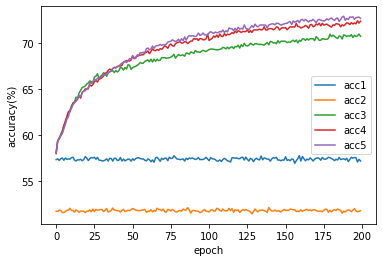

In [157]:
plt.plot(acc1, label='acc1')
plt.plot(acc2, label='acc2')
plt.plot(acc3, label='acc3')
plt.plot(acc4, label='acc4')
plt.plot(acc5, label='acc5')
plt.xlabel('epoch')
plt.ylabel('accuracy(%)')
plt.legend()
plt.show()